---
# Préparation au TP "synthèse par la méthode bilinéaire"
---

Si vous naviguez ici avec Github, cliquez ici [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/master?labpath=discret%2Ftp%2FFILT_prepa_bilineaire.ipynb) pour pouvoir **exécuter en ligne** le code octave ou python.

|        | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./FILT_prepa_bilineaire_python.ipynb) | [corrigé python](./FILT_prepa_bilineaire_python_corr.ipynb) |
|Octave  | [sujet octave](./FILT_prepa_bilineaire.ipynb) | [corrigé octave](./FILT_prepa_bilineaire_octave_corr.ipynb) |



## I - Etude des différentiateurs
---


L'exercice 2.1 du polycopié a permi de proposer trois différentiateurs dérivés de 3 intégrateurs permettant d'approcher le comportement de l'opérateur dérivé $D$ et de la variable associée $p$ :

$D =\frac{d}{dt} \leftrightarrow p \leftrightarrow \underbrace{\frac{1}{T_e}(1-z^{-1})}_{\text{Backward Euler}}\leftrightarrow \underbrace{\frac{1}{T_e}(z-1)}_{\text{Forward Euler}} \leftrightarrow \underbrace{\frac{2}{T_e}\frac{1-z^{-1}}{1+z^{-1}}}_{\text{Bilinéaire ou Tustin}} 
$

Dans la suite nous notons $H_f$, $H_b$ et $H_t$ les fonctions de trasnfert des systmes respectifs "forward", "backward" et "trapezoidal"

### I1 - Récurrences
Voici 4 récurrences qui sont à associer à ces 3 différentiateurs :
- $ y[k] = \frac{x[k+1]-x[k]}{T_e} $
- $ \frac{y[k+1] + y[k]}{2} = \frac{x[k+1]-x[k]}{T_e}$
- $ y[k] = \frac{x[k]-x[k-1]}{T_e} $
- $ y[k+1] = \frac{x[k+1]-x[k]}{T_e} $

Lequel de ces différentiateurs n'est pas causal ?

Voici trois phrases à associer à chacun des différentiateur :
- Te fois la sortie à l'instant k vaut l'incrément de l'entrée entre les instants k et k-1
- la pente entre l'instant k et k+1 vaut la moyenne de la sortie aux instants k et k+1  
- Te fois la sortie à l'instant k-1 vaut l'incrément de l'entrée entre les instants k et k-1




### I2 - Réponses harmoniques

Ecrivez les fonctions de transfert en fonction de $z$ et non pas $z^{-1}$ pour obtenir plus facilement l'expression des réponses harmoniques $H(\omega)$.

On va considérer le passage d'ondes pures continues $e^{i\omega\,t}$ et discrètes  $e^{i\omega\,k\,T_e}$. Il est fréquent et pratique de considérer les fréquences ou bien pulsations normalisées par rapport à $F_e$ soit avec :
$\tilde{f} = \frac{f}{F_e} = \tilde{\omega} = \frac{\omega}{\omega_e}$

 1) Retrouvez la relation entre l'opérateur $p$ et $\omega$ puis $\tilde{f}$ en regardant ce que donne la dérivée de l'onde pure continue $e^{i\omega\,t}$. Dessinez dans le plan complexe le lieu de $p$ lorsque $\tilde{f}$ va de $-\infty$ à $+\infty$

 2) De même, retrouvez la relation entre l'opérateur $z$ et $\omega$ puis $\tilde{f}$ en regardant ce que donne **l'avance d'un échantillon** sur l'onde pure discrète $e^{i\omega\,k\,T_e}$. Dessinez dans le plan complexe le lieu de $z$ lorsque $\tilde{f}$ va de $0$ à $1$ puis de $-\infty$ à $+\infty$
 
 

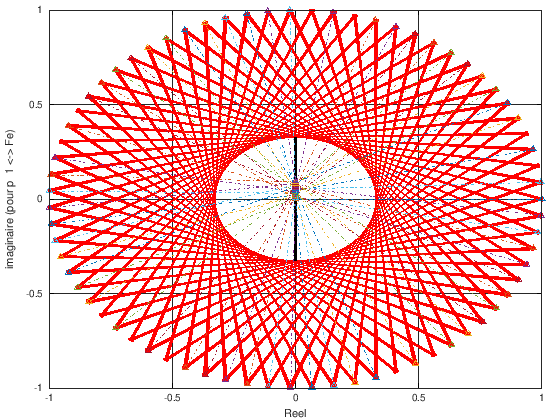

In [1]:
clear all; close all; clc;
Fe=48000;N=100;Df=Fe/N;Te=1/Fe;
f=-2*Fe:Df:2*Fe;         % vecteur des fréquences
w=2*pi*f;            % vecteur des pulsations

%% VOTRE CODE:  f_tilde =
% Calculant la fréquence normalisée à partir de f et/ou de w
f_tilde = f;

%% VOTRE CODE:  p = 
% définissez le vecteur p à partir de f_tilde
% par défaut i = sqrt(-1)  permet de faire des complexes
p=i*f;

%% VOTRE CODE:  z = 
% définissez le vecteur z à partir de f_tilde
% la fonction 'exp' de matlab est vectorisée et complexe.
z=exp(i*f);       


%% Le code suivant  affiche dans le plan complexe
% en noir le lieu de p (avec l'axe imaginaire tel que 1 <-> Fe)
% en rouge le lieu de z
% 
plot(real(z),imag(z),'r.-');hold on;
plot(real(p),imag(p)/2/pi/Fe,'k.-');
sel = (2*N)+1:1:N*2.6;
plot([real(p(sel)) ; real(z(sel))], [imag(p(sel))/2/pi/Fe ; imag(z(sel))],'-.>'); 
grid on;
xlabel('Reel');
ylabel('imaginaire (pour p  1 <-> Fe)');

 1) Dessinez, sous forme de vecteur dans le plan complexe, le vecteur $1-z$ (pôle en $1$) et le vecteur $z-1$ (pôle en $-1$). On prendra pour $z$ un point quelconque du cercle unité. La tradition veut que les pôles soient dessinés par "des petits plus" + et les zéros par "des petits ronds".
 2) Donnez et dessinez le module et l'argument de ces vecteurs pour $\tilde{f}$ proche de $0$ de $0.25$ et $0.5$.  
 Déduisez-en géométriquement un équivalent de la réponse harmonique du dérivateur Forward $H_f(\tilde{f})$ autour de ces fréquences. 
 3) Faites de même pour un zéro en $0$. Comparez avec l'effet d'un retard de $T_e$ et concluez que c'est bête en fait !
 4) Déduisez alors géométriquement un équivalent de la réponse harmonique du dérivateur Backward $H_B(\tilde{f})$ pour $\tilde{f}$ proche de $0$ de $0.25$ et $0.5$.  
 5) Calculez analytiquement ces deux réponses harmoniques que vous exprimerez aussi bien en fonction de $\omega$ que de $\tilde{f}$.  
 Faites apparaître des cosinus et sinus avec **ASTUCE !**  
 Factoriser les $e^{i\,\omega\,T_e} \pm 1$ en $e^{\frac{-i\,\omega\,T_e}{2}}(e^{\frac{i\,\omega\,T_e}{2}} \pm e^{\frac{-i\,\omega\,T_e}{2}})$ et avec la vision d'Euler obtenez des $e^{i.\ldots.\omega}\cos(\ldots\omega)$ ou avec des $\sin$.  
 6) Vérifiez géométriquement ces résultats avec les équivalents des questions précédentes.
 7) Esquissez la réponse harmonique (module et argument) en échelle linéaire ($\tilde{f}\in[-2\,,\, 2]$) puis logarithmique (Diagramme de Bode avec $\tilde{f}\in]\frac{1}{10}\,,\, 2]$).

Modifiez le code suivant pour vérifier vos calculs

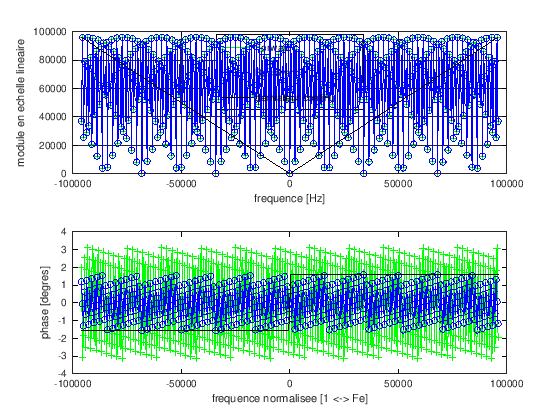

In [2]:
% fonctions de transfert (fonctions inline de la variable z VECTORISEE "./")
Hf = @(z) ((z-1)/Te);  %Forward
Hb = @(z) ((z-1)./z/Te);  %Backward

%% VOTRE MODIF :
% Passez l'axe des fréquences en unités normalisées (1<-> Fe)
% Passez la phase en degrés
subplot(211)
plot(f,abs(Hf(z)),'g+-'); hold on;
plot(f,abs(Hb(z)),'bo-'); 
plot(f,abs(p),'k'); grid on;
xlabel("frequence [Hz]");
ylabel("module en echelle lineaire")
legend(["Forward";"Backward";"derivateur continu"],"location","north")
subplot(212)
plot(f,arg(Hf(z)),'g+-'); hold on;
plot(f,arg(Hb(z)),'bo-'); 
plot(f,arg(p),'k');
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("phase [degres]")


Remarquez bien la périodicité des réponses harmoniques des systèmes discrets. 

 1) Quelle est la plage de fréquence la plus petite nécessaire à l'observation de la réponse harmonique : **l'intervale fondamental**  
 Comment déduire de l'intervalle fondamental le reste de la réponse harmonique ?  
 2) Esquissez l'allure d'un filtre passe-haut, passe-bas, passe bande dans le cas discret. Ces filtres approchant la dérivée sont-ils bien passe-haut ?
 4) Les 3 systèmes sont-ils à phase linéaire ? Comparez ces phases à celles d'un retard.
 
 
On peut utiliser l'échelle log en fréquence et en gain pour mieux observer cette zone :

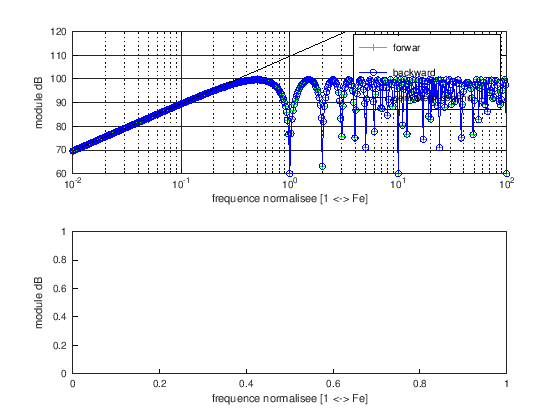

In [3]:
%% fonction pratique pour faire des dB et 
%% éviter les -infini à afficher etc.
dBbrut = @(gain) 20*log10(abs(gain));
sat = @(x, xmin, xmax) x.*(x>xmin).*(x<xmax)+xmin*(x<xmin)+xmax*(x>xmax);
dBde = @(gain) sat(dBbrut(gain),60, 120); % dB compris entre 60 et 120

%% VOTRE CORRECTION de ftilde=
% On veut un vecteur en échelle log allant de 0.01 à 2
% pour la fréquence normalisée. On garde le 1/100 de résolution
% Attention log est en base népérienne et log10 celui en base 10
ftilde = 10.^(-2:1/100:2); % de 10^-2 à 2

%% on redéfinit z et p pour ces fréquences
z = exp(i*2*pi*ftilde);
p = i*2*pi*ftilde*Fe;

%% VOTRE MODIFICATION
% Passer l'axe des fréquences en fréquences réelles [Hz]
subplot(211)
semilogx(ftilde,dBde(Hf(z)),'g+-'); hold on;
semilogx(ftilde,dBde(Hb(z)),'bo-'); 
semilogx(ftilde,dBde(p),'k'); grid on;
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("module dB");
legend(["forwar";"backward";"derivateur continu"],"location","northeast")

%% VOTRE CODE
% affichant les 3 phases en degrés
subplot(212)
xlabel("frequence normalisee [1 <-> Fe]");
ylabel("module dB");


Les approximations de la dérivée ne sont valables que pour certaines fréquences !

 1) Identifiez, à la décade près, la plage de fréquence normalisée où le gain des approximations ne s'écartent pas plus de 3dB de la dérivée continue.
 2) Pour dériver un signal de parole entre 0 Hz et 8 KHz quelle fréquence d'échantillonnage conviendrait 192 kHz, 96 kHz, 48 kHz, 24 kHz, 12 kHz, 8 kHz

## I3 - Transformée bilinéaire
---

Faites la même étude pour le dérivateur $h_t$ bilinéaire :

 1) fonction de transfert en z ;
 2) schéma géométrique des pôles et zéros ;
 3) équivalents géométriques en 0 et 0.5 et esquisse de réponbse harmonique ;
 4) fonction analytique (elle doit être purement imaginaire et un peu tangente !) ;
 5) tracé de la réponse harmonique en linéaire puis en diagramme de Bode ;
 6) vérifications avec octave.

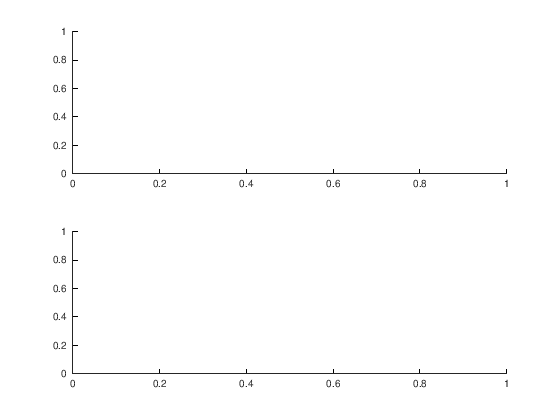

In [47]:
% fonctions de transfert 

%%VOTRE MODIF de Ht = 
% attention à bien demander les opérations élément par élément !
% genre x.*y ou x.^2 
Ht = @(z) ((z-1)*2/Te); % bilineaire ou Tustin ou trapezoidale

%%VOTRE BODE de Ht et de p continu
% Inspirez-vous du code précédent
dBde = @(gain) sat(dBbrut(gain), 60, 120); % dB compris entre 60 et 120
subplot(211);
% gain en dB avec semilogx et fréquences normalisées
hold on;
% gain en dB de p en noir
subplot(212);
% phase en degré avec semilogx et fréquences normalisées
hold on;
% phase en degré de p en noir


Donnez l'expression analytique de $H_t(\omega)$ que vous avez calculé et superposez l'affichage de la version numérique pour vérifier l'exactitude de vos calculs.

> **Cette fonction de transfert est très importante, car elle permet de   
> faire des synthèses de filtre à partir du continu**


In [1]:
%% VOTRE MODIF de Ht_analytique = 
% f est la fréquence normalisée !
Ht_analytique = @(f) cos(2*pi*f)/Te; 


%% VOTRE BODE de Ht, Ht analytique et p continu


UsageError: Cell magic `%%VOTRE` not found.


### I4 - Avec la boite à outils "control" 
---

Il est possible d'utiliser la boîte à outils "control" pour obtenir ces affichages en quelques lignes de code.
Remarquons que ces fonctions n'ont rien d'indispensable puisque nous avons pu tout faire avec des fonctions basiques et quelques conaissances théoriques. 

Donc on peut utiliser les mêmes fonctions qu'en continu :
 - tf(num, den, Te) : pour definir un système par sa fonction de transfert
 - bode
 - impulse 
 - pzmap
 
Définissons les fonctions de transfert avec `tf`

In [51]:
pkg load control %% pour octave uniquement, inutile avec matlab

% si tf reçoit un troisième argument alors c'est Te
%    et tf contruit un système discret
% coef des polynomes en z ! pas z^-1
backward=tf([1 -1]/Te , [1],Te) 
        %   (z -1)/Te /  1   = (z-1)/Te = Hb

forward=tf([1 -1]/Te ,[1 0],Te) 
        %  (z -1)/Te / z     = (1-z^-1)/Te = Hf

tustin= tf(2*[1 -1]/Te , [1 1],Te) 
        %  2 (z -1)/Te / (z+1)     = Ht

% système continu celui là!
derivateur = tf([1 0],[1])


Transfer function 'backward' from input 'u1' to output ...

 y1:  4.8e+04 z - 4.8e+04

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'forward' from input 'u1' to output ...

      4.8e+04 z - 4.8e+04
 y1:  -------------------
               z         

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'tustin' from input 'u1' to output ...

      9.6e+04 z - 9.6e+04
 y1:  -------------------
             z + 1       

Sampling time: 2.08333e-05 s
Discrete-time model.

Transfer function 'derivateur' from input 'u1' to output ...

 y1:  s

Continuous-time model.


#### Traçons le bode des fonctions

Utilisons `bode`

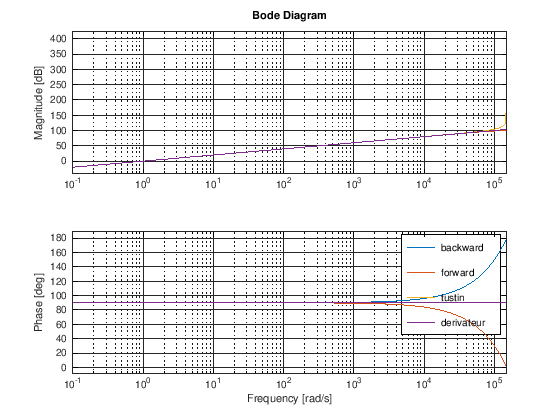

In [50]:
bode(backward,forward,tustin,derivateur)

**Critiquons l'outil !**
- Ne vous faites pas avoir, les Anglais semblent confondre fréquence et pulsation sur ce coup.
- Les modulos $2\pi$ sur la phase sont gérés de manière surprenante surtout pour la bilinéaire.
- La fréquence d'échantillonnage et de Nyquist $Fe/2$ ne sont pas clairement indiqué.

Voyons les réponses temporelles

ça passe pour forward et tustin

 en revanche pour backward...

error: ss: dss2ss: this descriptor system cannot be converted to regular state-space form
error: called from
    __dss2ss__ at line 33 column 7
    ssdata at line 58 column 14
    __time_response__>__impulse_response__ at line 308 column 8
    __time_response__ at line 136 column 12
    impulse at line 74 column 10


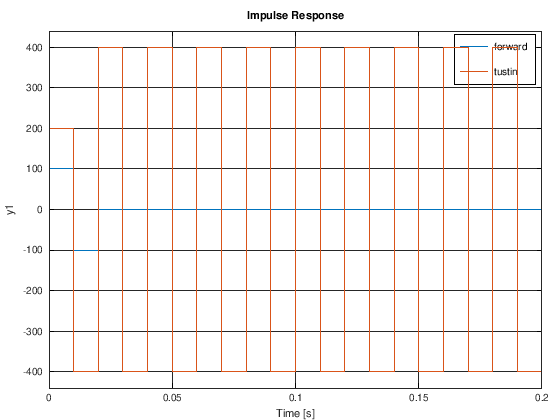

In [17]:
impulse(forward,tustin,T=k*Te)
disp("ça passe pour forward et tustin")
disp("\n en revanche pour backward...\n")
impulse(backward,tustin,T=k*Te)


**Critiquons l'outil**

- Il ne sait pas tracer les RIP des systèmes non casaux (message d'erreur pour backward) ! Le NASE !  
- Alors que le signal est discret il affiche une fonction en escalier ! Théoriquement môche ça !  
  C'est comme si le signal était maintenu pendant une durée Te : on parle de bloqueur d'ordre zero (*zero order hold* en anglais). 

### I3 - Réponse impulsionnelle (si vous avez le temps)

La réponse impulsionnelle du forward et backward est immédiate dès que l'on remarque que la fonction de transfert est déjà sous la forme d'une transformée en Z : $\sum a(n)z^{-n}$   
Retrouvez le résultat sur la causalité de ces filtres, sont ils à réponse impulsionnelle finie (FIR) ou infinie (IIR) ?

Obtenez la réponse impulsionnelle de $h_t$ par division en puissances croissante de $z^{-1}$, ce filtre est-il causal, FIR ou IIR ? 

On trouve ainsi des approximations de la dérivée d'un dirac lorsque $Te\to 0$...


On peut vérifier ces réponses impulsionnelles en faisant la transformée inverse de la fonction de transfert. En théorie on doit faire une TFSD inverse sur toutes les fréquences continues entre 0 et Fe car la réponse impulsionnelle est à support temporel infini dans le cas général. 

Dans le cas pratique on a un certain nombre de points en fréquences $N=F_e/\Delta_f$ et en temps et opérons donc à des TFD et TFD inverse pour obtenir un signal de période N !

Utilisons donc ifft et fft.


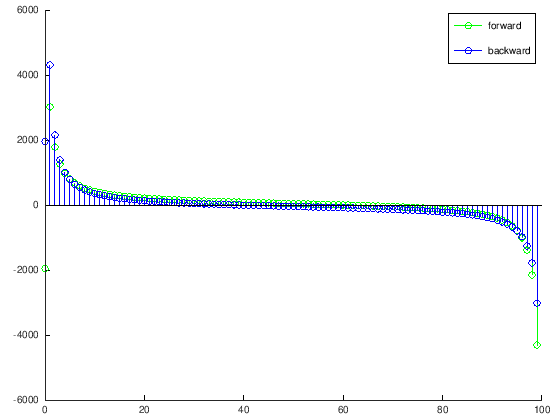

In [40]:
N = Fe/Df;
k=0:(N-1);
stem(k,ifft(Hf(z(1:(Fe/Df)))),'g'); hold on;
stem(k,ifft(Hb(z(1:(Fe/Df)))),'b'); 
legend("forward","backward");

Et oui le signal est rendu périodique sans trop de casse. Si l'on veut observer les temps négatifs pour notre filtre non causal, on peut utiliser la fonction ||fftshift|| qui coupe la dernière moitiée (l'alias) et la mets au début. 

Ce qui donne en affichant les valeurs négatives du signal périodique :

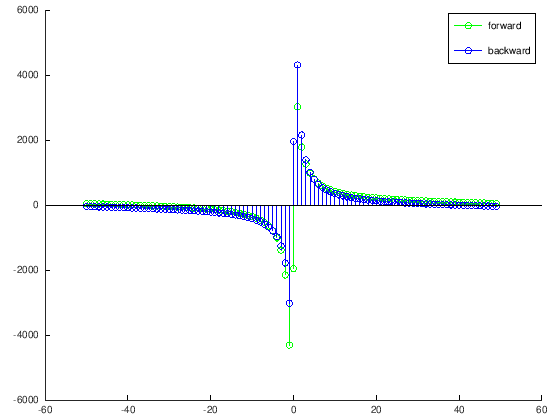

In [41]:
k=k-N/2;
stem(k,fftshift(ifft(Hf(z(1:(Fe/Df))))),'g'); hold on;
stem(k,fftshift(ifft(Hb(z(1:(Fe/Df))))),'b'); 
legend("forward","backward");

On observe donc bien les réponses impulsionnelles finies rendues périodiques dans le temps par notre échantillonnage de N points en fréquence. Ce qui n'as pas d'impact et permet d'utiliser la FFT à la place de la TFSD sans casse.

En revanche pour une réponse impulsionnelle infinie cela pose problème, car les recopies périodiques se superposent et s'ajoutent ! **On a du repliement mais temporel** 

Observons donc la réponse impulsionnelle nulle pour $k<0$ et telle que $\frac{T_e}{2}. h_t[k] = 2.(-1)^k + \delta_0[k] \leftrightarrow (1, -2, 2, -2, \dots)$, mais rendue périodique avec effet de repliement temporel :

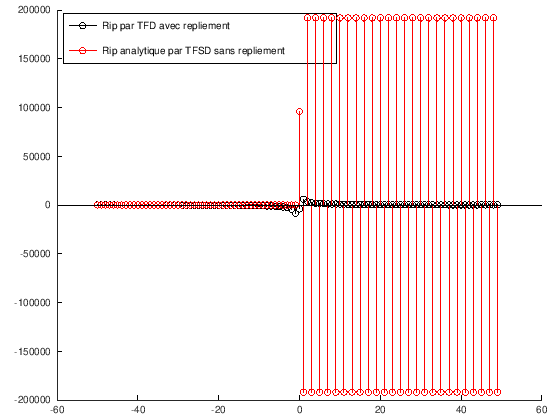

In [42]:
stem(k,fftshift(ifft(Ht(z(1:(Fe/Df))))),'k'); hold on;
ht = 2/Te*(k>=0) .* (2*(-1).^k -(k==0)) ;
stem(k,ht,'r');
legend("Rip par TFD avec repliement","Rip analytique par TFSD sans repliement","location","northwest")

On peut toujours se rassurer et utiliser la récurrence pour trouver la réponse impulsionnelle !

Ce qui donne

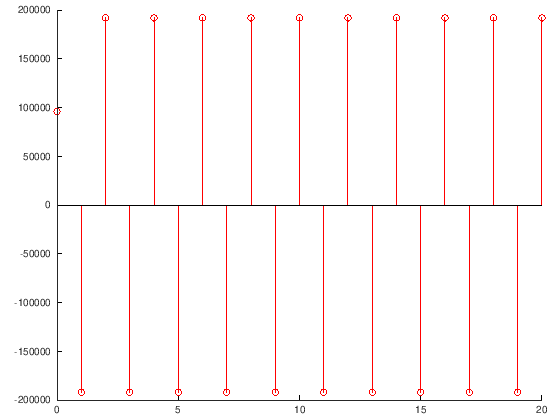

In [43]:
k=0:20 ;
x = (k==0) ; % impulsion unité (vrai = 1, faux = 0)
y = zeros(1,21);

y(1) = x(1)/Te*2 ; % première itération

for id=2:length(k)
    y(id) = -y(id-1) + (x(id)-x(id-1))/Te*2 ;
end
stem(k,y,'r'); hold on



## II - Synthèse à partir du continu par la transformation bilinéaire
---

On désire adapter un filtre du second ordre continu de la forme 

$G(p) = \frac{\omega_n^2}{p^2+ 2\zeta\omega_n\,p+{\omega_n}^2}$





Transfer function 'second' from input 'u1' to output ...

             3.948e+07        
 y1:  ------------------------
      s^2 + 1257 s + 3.948e+07

Continuous-time model.


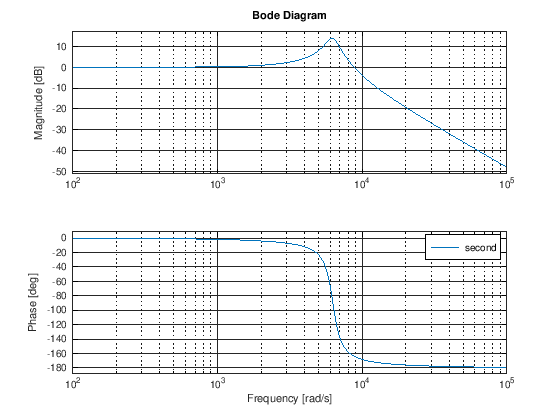

In [18]:
wn=1000*2*pi;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
bode(second)

Pour cela nous approchons l'opérateur dérivé par les 3 forme de différentiateurs étudiés précédemment.

Calculez analytiquement les fonctions de transfert par substituion de l'opérateur p en système discret :
- $G_f(z)=G\left(p=\frac{1-z^{-1}}{T_e}\right)$
- $G_b(z)=G\left(p=\frac{z-1}{T_e}\right)$
- $G_t(z)=G\left(p=\frac{2}{T_e}\frac{z-1}{z+1}\right)$

Effectuez les vérifications :
- pour $\omega=0$, en remplaçant z par 1 ($z=e^0=1$) on doit avoir $G_i(z=1)=G(f=0)=1$, car on sait que l'approximation fonctionne pour $\omega << F_e/2$
- les coefficients doivent être homogènes en dimension (p ~ $\omega$ et z est sans dimention)

Donnez l'équation aux différences de chacun de ces systèmes et vérifiez l'homogénéité des coefficients.

On peut vérifier numériquement les résultats pour la transformée bilinéaire qui peut être calculée avec la commande "c2d" pour "continuous to discrete".


Transfer function 'second' from input 'u1' to output ...

              3948        
 y1:  --------------------
      s^2 + 12.57 s + 3948

Continuous-time model.

Transfer function 'Gt' from input 'u1' to output ...

      0.08497 z^2 + 0.1699 z + 0.08497
 y1:  --------------------------------
           z^2 - 1.552 z + 0.8918     

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'Gf' from input 'u1' to output ...

        0.1833 z + 0.1757   
 y1:  ----------------------
      z^2 - 1.523 z + 0.8819

Sampling time: 0.01 s
Discrete-time model.


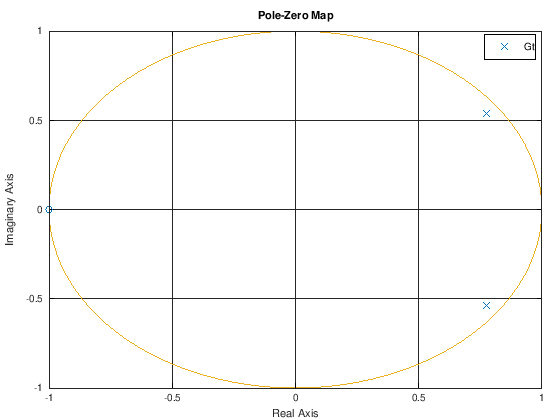

In [22]:
wn=2*pi*10;
zeta = 0.1; 
second=tf([wn^2],[1 2*zeta*wn wn^2])
Fe=100;Te=1/Fe;
Gt=c2d(second,Te,'bilinear')
Gf=c2d(second,Te,'zoh')
pzmap(Gt); hold on;
z=exp(i*2*pi*(0:1:100)/100);
plot(real(z),imag(z))

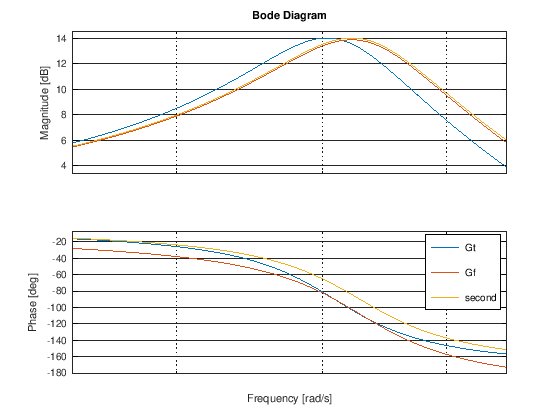

In [20]:
bode(Gt,Gf,second,W=2*pi*(7:0.01:12))